1.Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#

2. Create a dataframe

In [ ]:
df=pd.read_csv('/content/sample_data/Zomato data .csv')

In [ ]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


**3. Finding the outliers in data (Data cleaning)**

a. Convert the data type of rating column using the UDF for changing the data type

In [ ]:
def change_data_type(x):
  x=str(x).split('/')
  x=x[0]
  return float(x)

In [ ]:
df['rate']=df['rate'].apply(change_data_type)

After spliting the '/' from rate column we got the below changes in our dataframe

In [ ]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


b. To check whether do we have a null values in our data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


With above **df.info()** command provides us the details of dataframe the datatype which our dataframe is using.

**Visualizing the type of resturants**

In [ ]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Types of Restaurants')

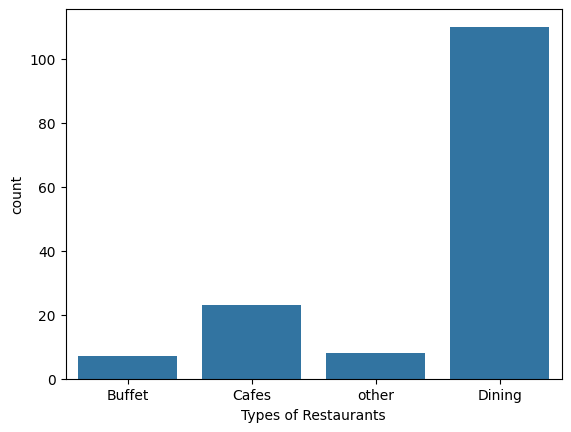

In [ ]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Types of Restaurants")

In [ ]:
grp_data=df.groupby('listed_in(type)')['votes'].sum()
fin_count=pd.DataFrame({'votes':grp_data})
fin_count

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


Now plotting the above results in line graph

Text(0, 0.5, 'Votes')

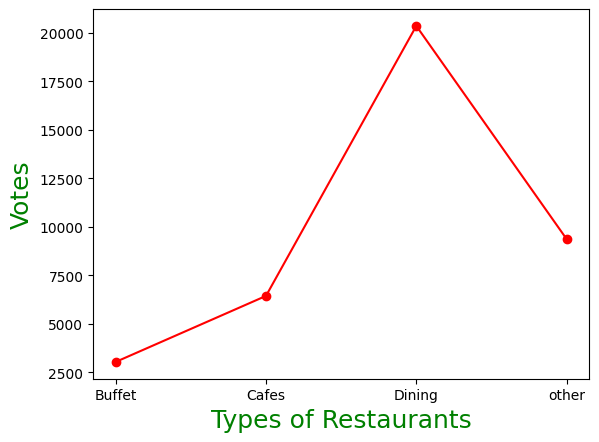

In [ ]:
plt.plot(fin_count.index,fin_count['votes'],c="red",marker="o")
plt.xlabel("Types of Restaurants",c="green",size=18)
plt.ylabel("Votes",c="green",size=18)

Text(0, 0.5, 'Frequency')

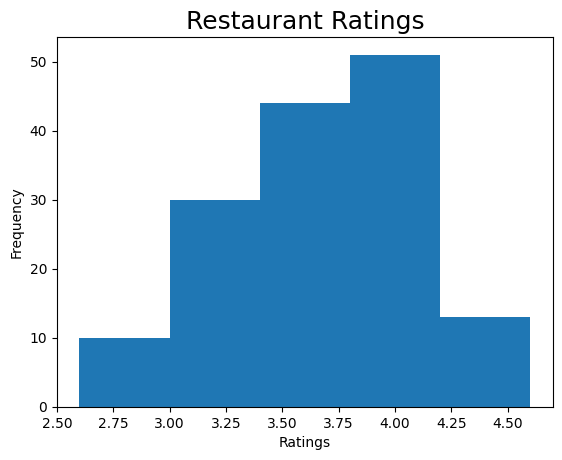

In [ ]:
plt.hist(df['rate'],bins=5)
plt.title("Restaurant Ratings",size=18)
plt.xlabel("Ratings")
plt.ylabel("Frequency")
#

Text(0.5, 0, 'Cost')

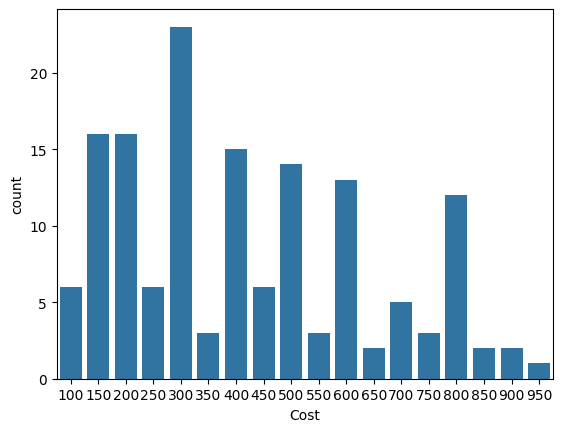

In [ ]:
cust_data=df['approx_cost(for two people)']
sns.countplot(x=cust_data)
plt.xlabel("Cost")

<Axes: xlabel='online_order', ylabel='rate'>

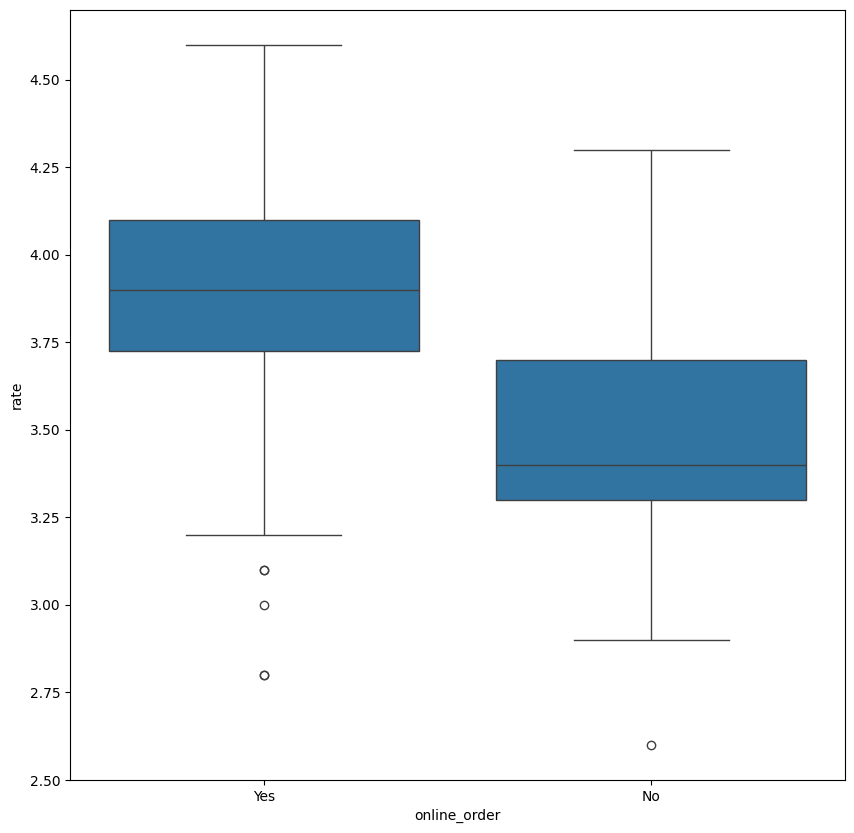

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x='online_order',y='rate',data=df)

In [ ]:
pv_data=df.pivot_table(index='listed_in(type)',columns='online_order',values='rate',aggfunc='size')
pv_data

online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


Text(50.722222222222214, 0.5, 'Types of Restaurants')

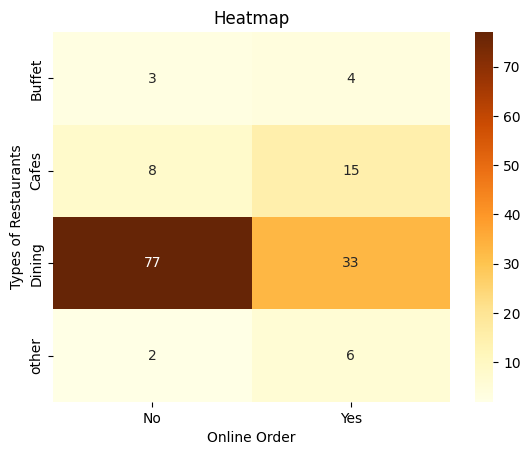

In [ ]:
sns.heatmap(pv_data,annot=True,cmap='YlOrBr')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Types of Restaurants")